# Import Library, Load Data

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
import pandas as pd
from pandas import DataFrame, Series

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_init = pd.read_csv('coffee_weather_janghoo.csv')
df_init = df_init.drop(['weather_mintemp', 'weather_maxwindspeed', 'weather_mintemp'], axis = 1)
df_weather_columns = df_init.iloc[:, 6:]
df_init.head()

,datetime,americano,cafelatte,cafemoca,caramelmatk,icedamericano,weather_avgtemp,weather_avgmoist,weather_avgwindspeed,weather_rain,weather_maxtemp
0,2016-06-24,35.18592,23.27069,15.43382,26.34946,9.55617,22.548148,80.461538,1.544444,5.124074,26.216667
1,2016-06-25,33.22670,23.75049,15.55377,25.54978,8.91643,22.292593,67.897436,2.177778,0.037037,27.259259
2,2016-06-26,36.98520,26.30947,17.15313,27.38904,11.07556,23.737037,64.256410,1.805556,0.000000,30.659259
3,2016-06-27,37.26509,24.39024,14.51419,25.26989,11.07556,23.538889,65.205128,1.114815,0.000000,29.077778
4,2016-06-28,37.18512,23.23070,14.19432,24.99000,12.23510,24.062963,65.205128,1.287037,0.000000,30.133333


In [5]:
df_weather_columns.head()

,weather_avgtemp,weather_avgmoist,weather_avgwindspeed,weather_rain,weather_maxtemp
0,22.548148,80.461538,1.544444,5.124074,26.216667
1,22.292593,67.897436,2.177778,0.037037,27.259259
2,23.737037,64.256410,1.805556,0.000000,30.659259
3,23.538889,65.205128,1.114815,0.000000,29.077778
4,24.062963,65.205128,1.287037,0.000000,30.133333


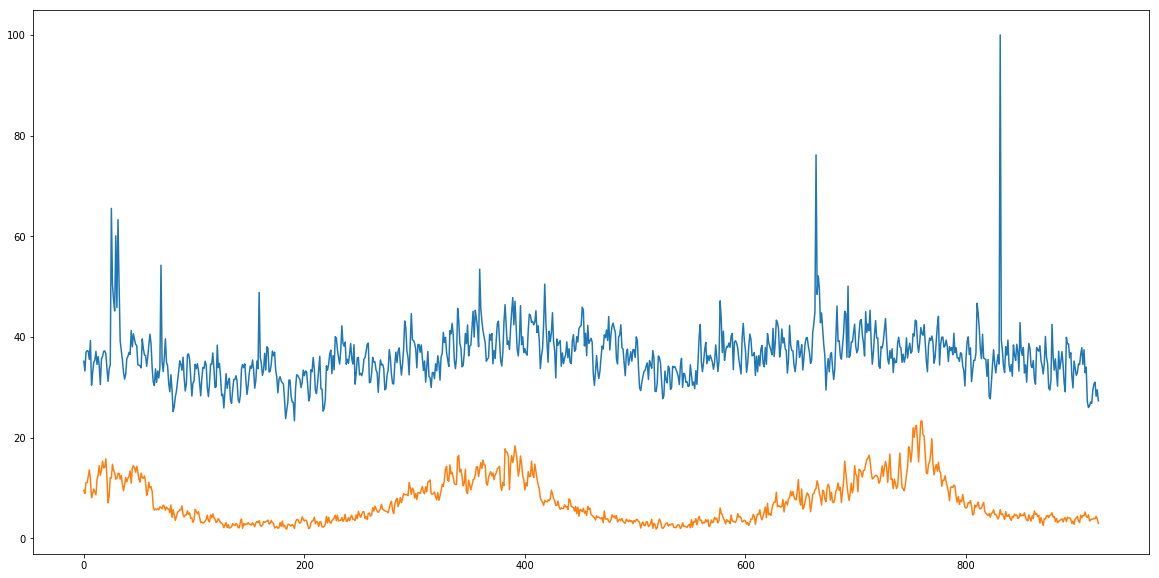

In [6]:
df_americano_and_icedamericano = df_init.drop(['caramelmatk', 'cafemoca', 'cafelatte'],axis = 1)
df_caffelatte_and_americano = df_init.drop(['caramelmatk', 'cafemoca', 'icedamericano'], axis = 1)


df_americano_and_icedamericano.head()

plt.figure(figsize = [20,10])
plt.plot(df_americano_and_icedamericano.iloc[:, 1:3])

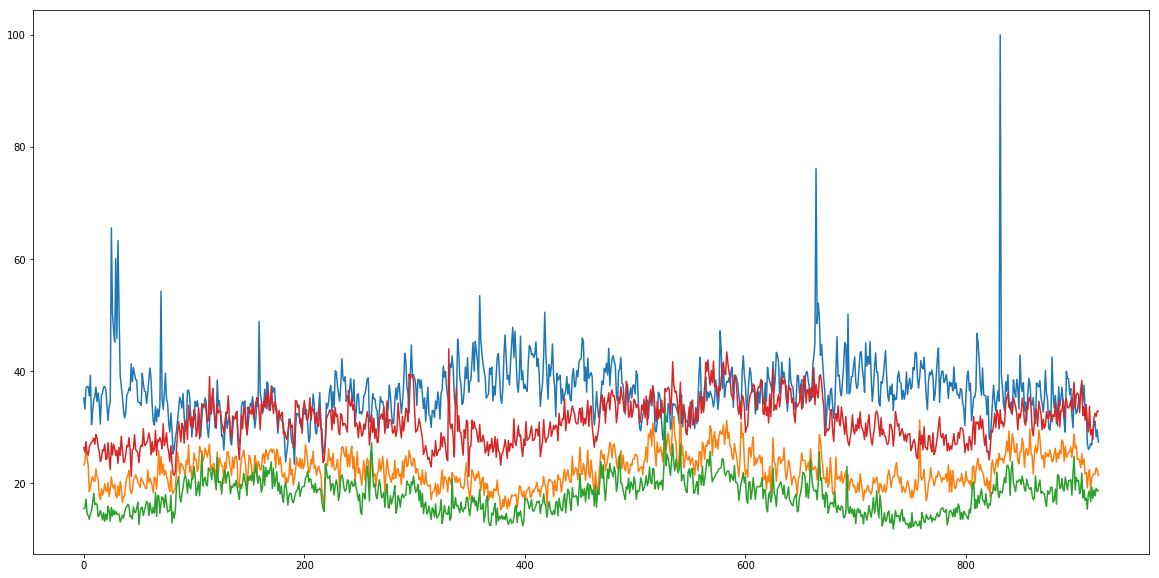

In [18]:
plt.figure(figsize = [20,10])
plt.plot(df_init.iloc[:, 1:5])

In [19]:
df_init.head()

,datetime,americano,cafelatte,cafemoca,caramelmatk,icedamericano,weather_avgtemp,weather_avgmoist,weather_avgwindspeed,weather_rain,weather_maxtemp
0,2016-06-24,35.18592,23.27069,15.43382,26.34946,9.55617,22.548148,80.461538,1.544444,5.124074,26.216667
1,2016-06-25,33.22670,23.75049,15.55377,25.54978,8.91643,22.292593,67.897436,2.177778,0.037037,27.259259
2,2016-06-26,36.98520,26.30947,17.15313,27.38904,11.07556,23.737037,64.256410,1.805556,0.000000,30.659259
3,2016-06-27,37.26509,24.39024,14.51419,25.26989,11.07556,23.538889,65.205128,1.114815,0.000000,29.077778
4,2016-06-28,37.18512,23.23070,14.19432,24.99000,12.23510,24.062963,65.205128,1.287037,0.000000,30.133333


In [21]:
df_init.loc[df_init.americano == df_init.americano.max()]

,datetime,americano,cafelatte,cafemoca,caramelmatk,icedamericano,weather_avgtemp,weather_avgmoist,weather_avgwindspeed,weather_rain,weather_maxtemp
831,2018-10-03,100.0,24.19032,18.63254,33.10675,5.71771,15.872222,70.692308,0.985185,0.0,23.588889


# Model

In [7]:
# 1. RNN
# 2. LSTM

## Hyper parameters

In [12]:
#about X
timesteps = sequence_length = 7
data_dim = 7

#about Y and hidden size
hidden_layer_size = 3
hidden_dim = 10
output_dim = 2

#about training
learning_rate = 0.01
epoch = 1


def set_activation_function(string):
    if string == 'tanh' :
        return tf.tanh, string
    elif string == 'relu' :
        return tf.nn.relu, string

#activation function
activation_function, activation_functionname = set_activation_function('tanh') #relu
activation_function, activation_functionname

(<function tensorflow.python.ops.gen_math_ops.tanh(x, name=None)>, 'tanh')

<h4>Kinds of Hyper parameters</h4>

- timesteps : <br>
- data_dim : data dimension <br>
- hidden_layer_size <br>
- hidden_dim = hidden_dimension <br>
    - https://stackoverflow.com/questions/37901047/what-is-num-units-in-tensorflow-basiclstmcell <br>
    - more hidden dimension, more memorize <br>
    
    


## Data Pre-Processing

In [9]:
df_xy = df_americano_and_icedamericano.iloc[:,1:]
np_xy = df_xy.to_numpy()
batch_size = np_size = len(np_xy)
np_xy

array([[35.18592   ,  9.55617   , 22.54814815, ...,  1.54444444,
         5.12407407, 26.21666667],
       [33.2267    ,  8.91643   , 22.29259259, ...,  2.17777778,
         0.03703704, 27.25925926],
       [36.9852    , 11.07556   , 23.73703704, ...,  1.80555556,
         0.        , 30.65925926],
       ...,
       [28.2287    ,  4.35825   , -7.29245283, ...,  2.25660377,
         0.        , -2.8509434 ],
       [29.50819   ,  3.83846   , -7.72641509, ...,  1.08113207,
         0.        , -1.74339623],
       [27.30907   ,  2.95881   , -6.20377359, ...,  0.98490566,
         0.        ,  0.06226415]])

In [10]:
def MinMaxScaler(data):
    ''' Min Max Normalization
    Parameters
    ----------
    data : numpy.ndarray
        input data to be normalized
        shape: [Batch size, dimension]
    Returns
    ----------
    data : numpy.ndarry
        normalized data
        shape: [Batch size, dimension]
    References
    ----------
    .. [1] http://sebastianraschka.com/Articles/2014_about_feature_scaling.html
    '''
    
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)


def StandardScaler(data):
#    avg = []
#    for i in range(0, np_xy[0], 1) :
#        np.mean(np_xy[:,i])
    avg = np.mean(np_xy, axis = 0)
    std = np.std(np_xy, axis = 0)
    
    final = (data - avg) / std
    
    return final




#scaled_np_xy = MinMaxScaler(np_xy)
scaled_np_xy = StandardScaler(np_xy)

scaled_np_xy

array([[-0.212581  ,  0.57899985,  0.8466481 , ...,  0.02319154,
         0.15854079,  0.68120671],
       [-0.58286084,  0.4293087 ,  0.82320154, ...,  1.23912125,
        -0.27339971,  0.77539438],
       [ 0.12747122,  0.93451807,  0.95572555, ...,  0.5244959 ,
        -0.27654453,  1.08254992],
       ...,
       [-1.52745034, -0.63724832, -1.89114912, ...,  1.39045842,
        -0.27654453, -1.94475721],
       [-1.28563505, -0.75887266, -1.93096403, ..., -0.86631679,
        -0.27654453, -1.84470155],
       [-1.70125443, -0.96469974, -1.79126564, ..., -1.05106083,
        -0.27654453, -1.68157844]])

In [11]:
# train/test split
train_size = int(len(scaled_np_xy) * 0.7)
train_set = scaled_np_xy[0:train_size]
test_set = scaled_np_xy[train_size - sequence_length:]
print('size : ', train_size)
# Index from [train_size - seq_length] to utilize past sequence

size :  644


In [12]:
# build datasets
def build_dataset(time_series, seq_length): # seq_length : count of time series (timesteps)
    dataX = []
    dataY = []
    for i in range(0, len(time_series) - seq_length): # 7개씩 묶는 과정
        _x = time_series[i:i + seq_length, :]
        _y = time_series[i + seq_length, 0:2]  # Next close
        print(_x, "->", _y)
        dataX.append(_x)
        dataY.append(_y)
    return np.array(dataX), np.array(dataY)

trainX, trainY = build_dataset(train_set, sequence_length)
testX, testY   = build_dataset(test_set , sequence_length)

[[-0.212581    0.57899985  0.8466481   1.12872705  0.02319154  0.15854079
   0.68120671]
 [-0.58286084  0.4293087   0.82320154  0.27196874  1.23912125 -0.27339971
   0.77539438]
 [ 0.12747122  0.93451807  0.95572555  0.02368368  0.5244959  -0.27654453
   1.08254992]
 [ 0.18036861  0.93451807  0.93754597  0.08837768 -0.80164967 -0.27654453
   0.9396791 ]
 [ 0.1652548   1.20583591  0.9856284   0.08837768 -0.47100212 -0.27654453
   1.03503784]
 [-0.1445698   1.52393251  1.04203605  0.06215038  0.33961769 -0.27654453
   1.05042908]
 [ 0.55820441  1.10292354  1.0121332   1.1217331   0.64893315 -0.19477931
   0.8337807 ]] -> [-1.11183096  0.23283644]
[[-0.58286084  0.4293087   0.82320154  0.27196874  1.23912125 -0.27339971
   0.77539438]
 [ 0.12747122  0.93451807  0.95572555  0.02368368  0.5244959  -0.27654453
   1.08254992]
 [ 0.18036861  0.93451807  0.93754597  0.08837768 -0.80164967 -0.27654453
   0.9396791 ]
 [ 0.1652548   1.20583591  0.9856284   0.08837768 -0.47100212 -0.27654453
   1.0

  -0.06058395]] -> [-0.9002414 -1.0582573]
[[-0.98336641 -1.02083334 -0.85288733 -0.11444674 -0.87631202 -0.25799011
  -0.74950905]
 [-0.85490186 -1.17988164 -0.41759694  0.45555981 -0.59543937 -0.23613364
  -0.4092289 ]
 [-1.67102681 -1.15181485 -0.09274322  0.42583554  0.9511379  -0.27654453
  -0.20462584]
 [-1.7919354  -1.12374805  0.13135827  1.04130273  0.50671914 -0.27654453
   0.02473704]
 [-1.2780772  -0.97405456  0.07087295 -0.04450728  1.1360161  -0.27654453
  -0.09454504]
 [-0.9002414  -1.0301905  -0.01594726  0.44506889  0.6809313   0.04155363
  -0.06058395]
 [-0.9002414  -1.0582573  -0.78101854 -0.32601358  1.95019126 -0.24682601
  -0.87096598]] -> [-0.75666493 -0.96469974]
[[-0.85490186 -1.17988164 -0.41759694  0.45555981 -0.59543937 -0.23613364
  -0.4092289 ]
 [-1.67102681 -1.15181485 -0.09274322  0.42583554  0.9511379  -0.27654453
  -0.20462584]
 [-1.7919354  -1.12374805  0.13135827  1.04130273  0.50671914 -0.27654453
   0.02473704]
 [-1.2780772  -0.97405456  0.07087295

  -0.93570955]] -> [-0.79444851 -0.92727579]
[[-0.00854929 -0.96469974 -0.93868813 -0.24269821 -0.37500767 -0.27654453
  -0.91463025]
 [ 0.12747122 -1.17988164 -1.27203697  0.40310522 -0.01947266 -0.25405909
  -1.58097039]
 [-0.55263322 -1.14245769 -1.59230332 -1.27369318  0.95469325 -0.27654453
  -1.72869279]
 [-0.80200447 -1.10503607 -1.60861397 -1.11458092 -0.27545786 -0.27654453
  -1.63601079]
 [-1.39898579 -1.18923646 -0.9434454   0.06914433 -0.73054267 -0.27654453
  -0.88217482]
 [-0.9002414  -1.17052682 -0.75655257  0.65663574 -0.61321612 -0.27654453
  -0.93570955]
 [-0.79444851 -0.92727579 -0.59038786  0.79936744 -0.54921982 -0.25311565
  -0.61550492]] -> [-0.94558283 -1.09567891]
[[ 0.12747122 -1.17988164 -1.27203697  0.40310522 -0.01947266 -0.25405909
  -1.58097039]
 [-0.55263322 -1.14245769 -1.59230332 -1.27369318  0.95469325 -0.27654453
  -1.72869279]
 [-0.80200447 -1.10503607 -1.60861397 -1.11458092 -0.27545786 -0.27654453
  -1.63601079]
 [-1.39898579 -1.18923646 -0.943445

  -0.69747998]] -> [ 0.22570815 -0.25366095]
[[-0.32593174 -0.30043973 -0.56915003 -1.43455392  0.27206604 -0.27654453
  -0.42997361]
 [-0.49973583 -0.33786369 -0.45383107 -1.45631797  0.0465361  -0.27654453
  -0.35835512]
 [-1.28563505 -0.37528764 -0.50645599 -0.87328981 -0.41411652 -0.27591556
  -0.38932067]
 [-1.24029362 -0.40335444 -0.56201413 -1.67710783 -0.05147081 -0.27151282
  -0.59977909]
 [-0.72643731 -0.42206642 -0.60194123 -1.33741579  0.11563064 -0.27119834
  -0.65665975]
 [-0.55263322 -0.46884519 -0.6530819  -0.8651302   0.5884922  -0.19084829
  -0.69747998]
 [ 0.22570815 -0.25366095 -0.63116447 -1.1290545  -0.19724016 -0.27575832
  -0.54507329]] -> [-0.09923026 -0.04783621]
[[-0.49973583 -0.33786369 -0.45383107 -1.45631797  0.0465361  -0.27654453
  -0.35835512]
 [-1.28563505 -0.37528764 -0.50645599 -0.87328981 -0.41411652 -0.27591556
  -0.38932067]
 [-1.24029362 -0.40335444 -0.56201413 -1.67710783 -0.05147081 -0.27151282
  -0.59977909]
 [-0.72643731 -0.42206642 -0.601941

   0.76452014]] -> [0.77734993 1.16841195]
[[ 0.10480145  1.69233564  0.6225466  -0.97819899  0.38228189 -0.27654453
   0.81956054]
 [-0.16724146  1.03743278  0.60147869 -0.91000802  0.10851994 -0.27654453
   0.76803336]
 [-0.40905486  1.00000883  0.63987667 -0.67920782  0.05518969 -0.27654453
   0.76937172]
 [ 0.93604021  1.75782639  0.66621157 -0.33300753 -0.28967927 -0.27654453
   0.82206998]
 [ 0.81513351  1.34617223  0.52723126  0.57795385 -0.38211837  0.08416589
   0.50972827]
 [ 1.20808123  1.41166299  0.67351738  0.17755048 -0.03013871 -0.18267176
   0.76452014]
 [ 0.77734993  1.16841195  0.49325075 -0.83657159  2.28794952 -0.27654453
   0.56945295]] -> [-0.16724146  0.8877393 ]
[[-0.16724146  1.03743278  0.60147869 -0.91000802  0.10851994 -0.27654453
   0.76803336]
 [-0.40905486  1.00000883  0.63987667 -0.67920782  0.05518969 -0.27654453
   0.76937172]
 [ 0.93604021  1.75782639  0.66621157 -0.33300753 -0.28967927 -0.27654453
   0.82206998]
 [ 0.81513351  1.34617223  0.52723126

   0.41219467]] -> [-0.4014989  -0.24430613]
[[ 0.17281076  0.09250011  1.06458312  0.39072011 -0.61175215 -0.27654453
   1.12838903]
 [-0.83978805 -0.13203661  0.90956975 -0.19478508 -0.22514631 -0.27654453
   0.93878896]
 [ 0.61865776 -0.12268179  0.75354149  0.74580854 -1.21407028 -0.27654453
   0.6648117 ]
 [ 0.38440032  0.07379047  0.68456104  1.25636655 -0.5511652   0.90936564
   0.69592876]
 [ 0.49019321 -0.18817254  0.55712129 -0.39245606  0.85433846 -0.27654453
   0.46220356]
 [ 0.55820441 -0.30979689  0.5097313   0.07089281 -0.87986737 -0.27654453
   0.41219467]
 [-0.4014989  -0.24430613  0.7080076   0.49227802 -0.63454822 -0.27654453
   0.77288494]] -> [ 0.0972436  -0.27237293]
[[-0.83978805 -0.13203661  0.90956975 -0.19478508 -0.22514631 -0.27654453
   0.93878896]
 [ 0.61865776 -0.12268179  0.75354149  0.74580854 -1.21407028 -0.27654453
   0.6648117 ]
 [ 0.38440032  0.07379047  0.68456104  1.25636655 -0.5511652   0.90936564
   0.69592876]
 [ 0.49019321 -0.18817254  0.557121

  -0.41153632]] -> [ 1.46501033 -0.87114219]
[[ 0.3541727  -0.69338191  0.63749803  0.91016626 -1.16074002 -0.26994041
   0.67100165]
 [ 0.24837981 -0.92727579  0.72448815  0.83148437 -0.97230647 -0.27654453
   0.73106093]
 [ 0.77734993 -0.38464246  0.71038623  0.80001162 -0.89764412 -0.27654453
   0.68940422]
 [ 0.66399919 -0.75887266  0.65613923  1.32874468 -0.96774489 -0.11585629
   0.52271423]
 [ 0.95870998 -0.75887266  0.17559064  1.17262326  0.78913469  1.05430013
   0.18266134]
 [ 0.56576037 -0.74016069 -0.1952073   0.79936744 -0.49320628 -0.26997601
  -0.41153632]
 [ 1.46501033 -0.87114219 -0.15852166  0.24394571 -0.47565142 -0.27654453
  -0.05239931]] -> [ 0.21059434 -0.90856381]
[[ 0.24837981 -0.92727579  0.72448815  0.83148437 -0.97230647 -0.27654453
   0.73106093]
 [ 0.77734993 -0.38464246  0.71038623  0.80001162 -0.89764412 -0.27654453
   0.68940422]
 [ 0.66399919 -0.75887266  0.65613923  1.32874468 -0.96774489 -0.11585629
   0.52271423]
 [ 0.95870998 -0.75887266  0.175590

  -0.98623295]] -> [-0.51484964 -0.89920899]
[[-0.31081793 -0.88985417 -1.89914737 -0.60052594  1.83286471 -0.26286458
  -2.04772635]
 [-0.00854929 -0.79629662 -2.22230206 -0.74390182  1.37422455 -0.27654453
  -2.33949065]
 [-0.18991123 -1.10503607 -2.16535264 -1.23738908 -0.47147169 -0.27654453
  -2.19787928]
 [ 0.01412048 -1.04890014 -1.67113812  0.64089936 -1.11807582 -0.27512936
  -1.77787783]
 [-0.10678622 -0.80565144 -1.21732835  0.43632646 -0.28256856 -0.27654453
  -1.22329145]
 [-0.25036458 -0.92727579 -0.88669794  0.36289003 -0.54921982 -0.26883973
  -0.98623295]
 [-0.51484964 -0.89920899 -0.996455    0.43457797 -1.42739128 -0.27654453
  -1.11404713]] -> [-0.25792054 -0.67466993]
[[-0.00854929 -0.79629662 -2.22230206 -0.74390182  1.37422455 -0.27654453
  -2.33949065]
 [-0.18991123 -1.10503607 -2.16535264 -1.23738908 -0.47147169 -0.27654453
  -2.19787928]
 [ 0.01412048 -1.04890014 -1.67113812  0.64089936 -1.11807582 -0.27512936
  -1.77787783]
 [-0.10678622 -0.80565144 -1.217328

   1.80797726e+00 -1.82357283e-01 -1.25373933e+00]] -> [ 0.27104958 -0.02912424]
[[ 9.96493563e-01 -1.32036605e-01 -6.32013986e-01 -7.08932092e-01
   2.04618571e+00 -2.75758322e-01 -6.92293807e-01]
 [-5.38907181e-02 -1.69460562e-01 -6.56310054e-01 -5.86538048e-01
  -2.18572263e-01 -2.76544526e-01 -4.77987574e-01]
 [ 2.86163392e-01 -2.06882178e-01 -5.16989945e-01 -2.52739336e-02
  -9.97193923e-01 -1.87074507e-01 -6.05634456e-01]
 [ 9.96493563e-01 -1.69460562e-01 -4.93126648e-01  3.61141547e-01
   2.23810753e+00 -9.99957348e-02 -7.32668970e-01]
 [ 4.67523442e-01  1.48636048e-01 -7.77280685e-01 -1.38209933e+00
   4.28250089e+00 -2.76544526e-01 -8.80836447e-01]
 [ 6.63999192e-01 -4.31421236e-01 -1.02873649e+00  9.53361128e-04
   1.80797726e+00 -1.82357283e-01 -1.25373933e+00]
 [ 2.71049582e-01 -2.91242352e-02 -7.83602343e-01 -7.77285238e-02
   4.71165645e-01 -2.76544526e-01 -6.36249632e-01]] -> [0.18036861 0.0550785 ]
[[-5.38907181e-02 -1.69460562e-01 -6.56310054e-01 -5.86538048e-01
  -2.1

  -5.95866010e-01  5.87739522e+00  4.74448876e-01]] -> [2.60607558 0.41995154]
[[-0.13701384  0.00829972  0.04130991  1.81238521 -0.69143382  2.25817728
  -0.24678444]
 [ 0.33905889  0.48544229  0.19643095  1.35078481  0.11918599 -0.23550468
   0.11725175]
 [ 0.85291709  0.99065401  0.39041802  0.96625586 -0.67070546 -0.27654453
   0.53464591]
 [ 1.66148419  1.93558433  0.83560443  0.12509589 -0.99363857 -0.27575832
   0.95624141]
 [ 1.57836107  1.36488421  0.79106382  1.97674292  0.3513777   2.43355521
   0.48842376]
 [-0.06144668  0.85031768  0.68093872  2.13148396 -0.59586601  5.87739522
   0.47444888]
 [ 2.60607558  0.41995154  0.22205357  1.57997456  0.57659545  0.33840008
   0.05739837]] -> [-0.06900264  0.10185727]
[[ 0.33905889  0.48544229  0.19643095  1.35078481  0.11918599 -0.23550468
   0.11725175]
 [ 0.85291709  0.99065401  0.39041802  0.96625586 -0.67070546 -0.27654453
   0.53464591]
 [ 1.66148419  1.93558433  0.83560443  0.12509589 -0.99363857 -0.27575832
   0.95624141]
 

   1.17138412]] -> [0.29371935 1.43037496]
[[-0.09923026  1.09356638  0.98919635  1.13572099 -0.49588957 -0.15688427
   0.94704012]
 [-0.26547839  0.90645127  0.9922546   1.36826968 -1.17496143  0.49755197
   0.93583129]
 [-0.24280862  0.65384542  0.75235217  2.07465816 -0.17235271  6.12504321
   0.39161726]
 [ 0.49019321  0.76611495  0.84206073  2.05367632 -0.33234347  4.93787511
   0.66849221]
 [ 0.68666896  1.56135413  1.20091099  1.10802129 -0.26499306 -0.15366529
   1.24168318]
 [ 0.32394697  2.30981454  1.21499687  0.79301767 -0.01947266 -0.26632387
   1.17138412]
 [ 0.29371935  1.43037496  1.05121079  1.07976943 -0.07280291  0.10869545
   0.98417984]] -> [-0.25792054  0.70062419]
[[-0.26547839  0.90645127  0.9922546   1.36826968 -1.17496143  0.49755197
   0.93583129]
 [-0.24280862  0.65384542  0.75235217  2.07465816 -0.17235271  6.12504321
   0.39161726]
 [ 0.49019321  0.76611495  0.84206073  2.05367632 -0.33234347  4.93787511
   0.66849221]
 [ 0.68666896  1.56135413  1.20091099

   0.79833604]] -> [-0.0916743   0.00829972]
[[ 1.96375283 -0.12268179  0.74598243  0.05340795 -0.21427901 -0.27654453
   0.80004056]
 [ 1.60858869  0.0270117   0.81488285  0.70784798 -0.48303561 -0.27654453
   0.7830707 ]
 [ 1.01916333 -0.24430613  0.84655834  0.89442988 -0.30121738 -0.25027048
   0.67714426]
 [ 0.233266   -0.29108491  0.81920723  1.47492734 -0.98585705 -0.11329297
   0.56788416]
 [-0.12190003 -0.24430613  0.78423936  1.56235166 -0.99672435 -0.15847151
   0.53055504]
 [ 0.8000197  -0.10396981  0.75965798  0.50626591 -0.51856331 -0.27414141
   0.79833604]
 [-0.0916743   0.00829972  0.70270536  0.42583554 -0.86269436 -0.27654453
   0.72572324]] -> [-0.12190003 -0.40335444]
[[ 1.60858869  0.0270117   0.81488285  0.70784798 -0.48303561 -0.27654453
   0.7830707 ]
 [ 1.01916333 -0.24430613  0.84655834  0.89442988 -0.30121738 -0.25027048
   0.67714426]
 [ 0.233266   -0.29108491  0.81920723  1.47492734 -0.98585705 -0.11329297
   0.56788416]
 [-0.12190003 -0.24430613  0.784239

  -0.14358488]] -> [-0.68865373 -1.0582573 ]
[[ 0.30127531 -0.50626681 -0.23461187  0.67586909 -1.38472708 -0.27654453
  -0.08199784]
 [ 0.21815219 -0.64660314 -0.17820422  1.00982998 -1.59093738 -0.27654453
  -0.14506845]
 [ 0.1652548  -0.58111238 -0.06520298  1.47492734 -0.97941717 -0.11065547
  -0.26418323]
 [ 0.36928651 -0.94598777 -0.07074244  2.03444297  0.91954224  4.70382959
  -0.30534437]
 [-0.18991123 -0.69338191 -0.09653558  0.54473261  2.63657507 -0.21822895
  -0.26852662]
 [-0.38638509 -0.88049701 -0.19018716  0.74014897 -0.63448114 -0.27013622
  -0.14358488]
 [-0.68865373 -1.0582573  -0.52013154  0.89967534 -1.0365711  -0.27654453
  -0.68051048]] -> [-0.28814816 -0.74016069]
[[ 0.21815219 -0.64660314 -0.17820422  1.00982998 -1.59093738 -0.27654453
  -0.14506845]
 [ 0.1652548  -0.58111238 -0.06520298  1.47492734 -0.97941717 -0.11065547
  -0.26418323]
 [ 0.36928651 -0.94598777 -0.07074244  2.03444297  0.91954224  4.70382959
  -0.30534437]
 [-0.18991123 -0.69338191 -0.096535

In [13]:
print(np.shape(trainX), np.shape(trainY))
print(np.shape(testX), np.shape(testY))

(637, 7, 7) (637, 2)
(277, 7, 7) (277, 2)


## RNN Model

In [14]:
X = tf.placeholder(tf.float32, [None, sequence_length, data_dim])
Y = tf.placeholder(tf.float32, [None, output_dim])

In [15]:
# build a LSTM network
def lstm_cell():
    cell = tf.contrib.rnn.BasicLSTMCell(num_units = hidden_dim, 
                                        state_is_tuple=True, 
                                        activation = activation_function)
    return cell


#cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_dim, 
#                                    state_is_tuple=True, activation=activation_function)

cell = tf.contrib.rnn.MultiRNNCell([lstm_cell() for _ in range(hidden_layer_size)],
                                   state_is_tuple=True)

outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)


Y_pred = tf.contrib.layers.fully_connected(
    outputs[:, -1], 
    output_dim, 
    activation_fn=None)  # We use the last cell's output


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Colocations handled automatically by placer.


In [16]:
# cost/loss
loss = tf.reduce_sum(tf.square(Y_pred - Y))  # sum of the squares

# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

In [17]:
# RMSE
targets = tf.placeholder(tf.float32, [None, 2])
predictions = tf.placeholder(tf.float32, [None, 2])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))

In [18]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(500):
        _, step_loss = sess.run([train, loss], feed_dict={
                                X: trainX, Y: trainY})
        print("[step: {}] loss: {}".format(i, step_loss))
        
        
    test_predict = sess.run(Y_pred, feed_dict={X: testX})
    rmse_val = sess.run(rmse, feed_dict={
                    targets: testY, predictions: test_predict})
    print("RMSE: {}".format(rmse_val))


[step: 0] loss: 1019.4874877929688
[step: 1] loss: 944.5676879882812
[step: 2] loss: 872.0234985351562
[step: 3] loss: 797.7749633789062
[step: 4] loss: 722.3286743164062
[step: 5] loss: 655.7180786132812
[step: 6] loss: 607.3008422851562
[step: 7] loss: 574.6791381835938
[step: 8] loss: 552.9053344726562
[step: 9] loss: 540.9852905273438
[step: 10] loss: 534.0938110351562
[step: 11] loss: 520.0650024414062
[step: 12] loss: 500.32830810546875
[step: 13] loss: 483.0662841796875
[step: 14] loss: 472.7252502441406
[step: 15] loss: 466.9867858886719
[step: 16] loss: 460.3877258300781
[step: 17] loss: 452.9670104980469
[step: 18] loss: 447.06884765625
[step: 19] loss: 441.6180725097656
[step: 20] loss: 434.8717346191406
[step: 21] loss: 428.0126037597656
[step: 22] loss: 421.8578186035156
[step: 23] loss: 415.75640869140625
[step: 24] loss: 409.87493896484375
[step: 25] loss: 405.1861877441406
[step: 26] loss: 401.38916015625
[step: 27] loss: 397.68243408203125
[step: 28] loss: 392.92053222

[step: 229] loss: 118.32532501220703
[step: 230] loss: 119.0782699584961
[step: 231] loss: 122.12992095947266
[step: 232] loss: 126.9666519165039
[step: 233] loss: 126.42977142333984
[step: 234] loss: 116.77847290039062
[step: 235] loss: 114.77437591552734
[step: 236] loss: 119.94418334960938
[step: 237] loss: 114.68183135986328
[step: 238] loss: 113.11705780029297
[step: 239] loss: 115.70679473876953
[step: 240] loss: 111.11377716064453
[step: 241] loss: 112.867431640625
[step: 242] loss: 111.73627471923828
[step: 243] loss: 109.6739730834961
[step: 244] loss: 111.27476501464844
[step: 245] loss: 108.3291244506836
[step: 246] loss: 109.18209838867188
[step: 247] loss: 108.23699951171875
[step: 248] loss: 106.85594940185547
[step: 249] loss: 107.5958023071289
[step: 250] loss: 105.70912170410156
[step: 251] loss: 105.8846664428711
[step: 252] loss: 105.40663146972656
[step: 253] loss: 104.11494445800781
[step: 254] loss: 104.52090454101562
[step: 255] loss: 103.4414291381836
[step: 256

[step: 460] loss: 58.705196380615234
[step: 461] loss: 56.88795852661133
[step: 462] loss: 58.453147888183594
[step: 463] loss: 57.812374114990234
[step: 464] loss: 57.54439163208008
[step: 465] loss: 57.178768157958984
[step: 466] loss: 55.7503547668457
[step: 467] loss: 56.62984848022461
[step: 468] loss: 55.74808883666992
[step: 469] loss: 56.04487991333008
[step: 470] loss: 55.8831787109375
[step: 471] loss: 55.072322845458984
[step: 472] loss: 55.219242095947266
[step: 473] loss: 54.99265670776367
[step: 474] loss: 54.44554901123047
[step: 475] loss: 54.74904251098633
[step: 476] loss: 54.353919982910156
[step: 477] loss: 54.23719024658203
[step: 478] loss: 54.59716033935547
[step: 479] loss: 54.11894607543945
[step: 480] loss: 53.857666015625
[step: 481] loss: 53.867431640625
[step: 482] loss: 53.53019332885742
[step: 483] loss: 53.22438049316406
[step: 484] loss: 53.234039306640625
[step: 485] loss: 53.02344512939453
[step: 486] loss: 52.93210983276367
[step: 487] loss: 53.00559

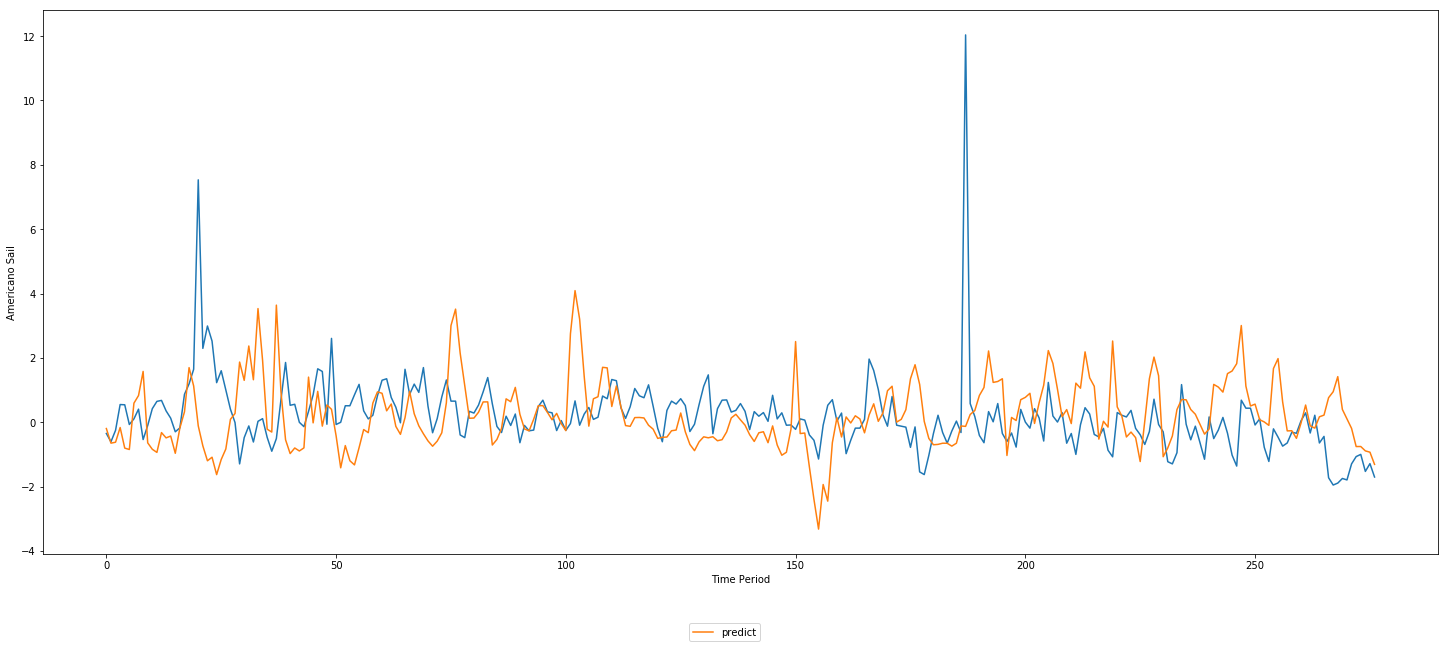

In [19]:
# Plot predictions
    ax = plt.figure(figsize = [25,10])
    plt.plot(testY[:,0])
    plt.plot(test_predict[:,0], label='predict')
    plt.xlabel("Time Period")
    plt.ylabel("Americano Sail")
    ax.legend(loc = 8)
    plt.show()

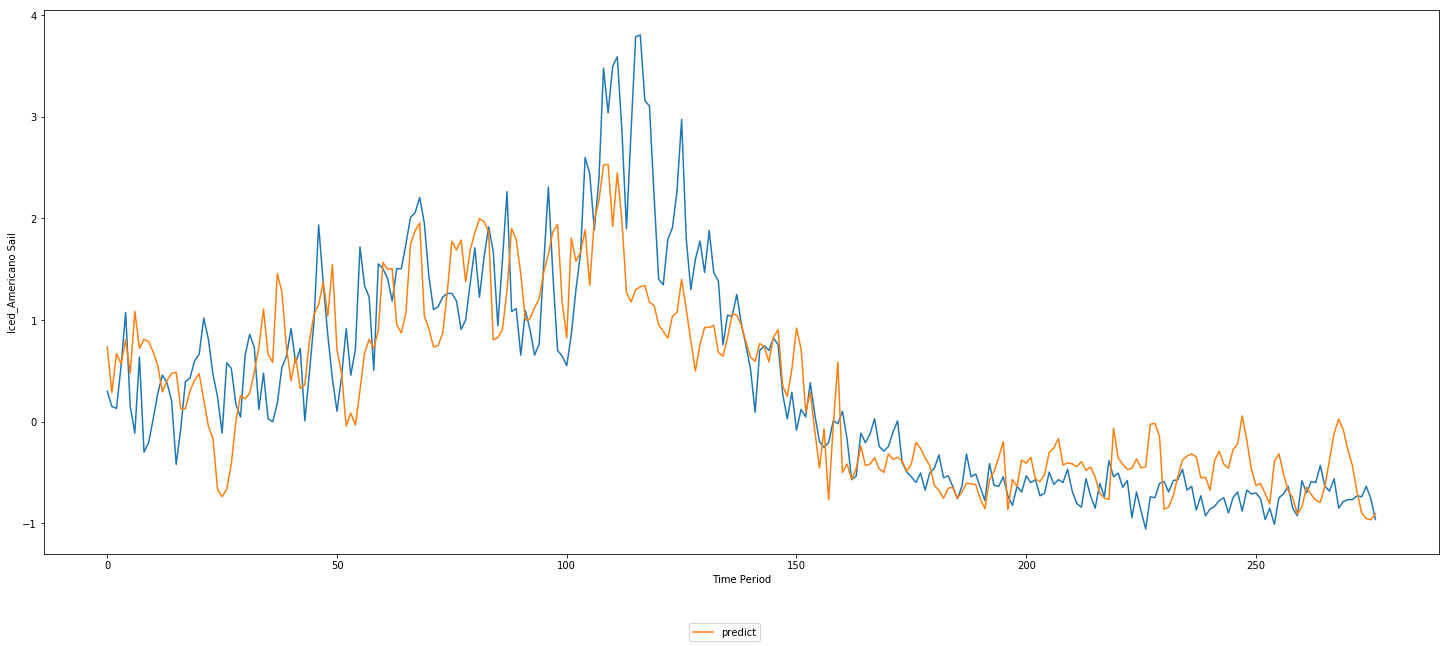

In [20]:
# Plot predictions
    ax2 = plt.figure(figsize = [25,10])
    plt.plot(testY[:,1])
    plt.plot(test_predict[:,1], label = 'predict')
    plt.xlabel("Time Period")
    plt.ylabel("Iced_Americano Sail")
    ax2.legend(loc = 8)
    plt.show()

In [21]:
# Plot predictions
    ax3 = plt.figure(figsize = [25,10])
    plt.plot(testY[:,2])
    plt.plot(test_predict[:,2], label = 'predict')
    plt.xlabel("Time Period")
    plt.ylabel("Caffe Moca Sail")
    ax3.legend(loc = 8)    
    plt.show()

In [22]:
# Plot predictions
    ax4 = plt.figure(figsize = [25,10])
    plt.plot(testY[:,3])
    plt.plot(test_predict[:,3], label = 'predict')
    plt.xlabel("Time Period")
    plt.ylabel("Caramel Matki Sail")
    ax4.legend(loc = 8)
    plt.show()

In [23]:
# Plot predictions
    plt.figure(figsize = [25,10])
    plt.plot(testY[:,4])
    plt.plot(test_predict[:,4], label = 'predict')
    plt.xlabel("Time Period")
    plt.ylabel("iced Americano Sail")
    ax.legend(loc = 8)
    plt.show()